## 用 LSTM 預測股票

### 安裝 pandas-datareader

In [1]:
! pip install pandas-datareader

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 讀取股票資料

In [6]:
import pandas_datareader
dataset_train = pandas_datareader.get_data_yahoo('2891.TW')

Populating the interactive namespace from numpy and matplotlib


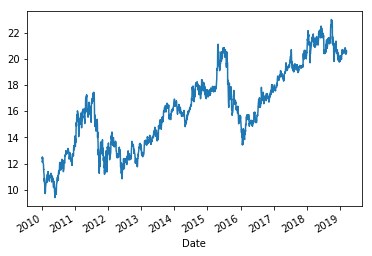

In [9]:
%pylab inline
dataset_train['Close'].plot(kind = 'line')

In [10]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2258 entries, 2010-01-04 to 2019-03-15
Data columns (total 6 columns):
High         2258 non-null float64
Low          2258 non-null float64
Open         2258 non-null float64
Close        2258 non-null float64
Volume       2258 non-null float64
Adj Close    2258 non-null float64
dtypes: float64(6)
memory usage: 123.5 KB


In [11]:
dataset_train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2258.000000,2258.000000,2258.000000,2258.000000,2.258000e+03,2258.000000
mean,16.337582,16.083328,16.219394,16.212431,4.479740e+07,13.753408
std,3.134006,3.133552,3.133594,3.141839,2.782286e+07,3.968961
min,9.570480,9.205890,9.448950,9.418570,0.000000e+00,6.508332
25%,13.614450,13.402200,13.514900,13.487150,2.657971e+07,10.343856
50%,16.260500,16.024200,16.148100,16.148100,3.787212e+07,13.325441
75%,18.750000,18.587500,18.700001,18.667026,5.371670e+07,16.667042
max,23.000000,22.799999,22.900000,23.000000,3.655387e+08,23.000000


In [12]:
training_set = dataset_train.iloc[:, 3:4].values

In [13]:
training_set

array([[12.15299988],
       [12.15299988],
       [12.51760006],
       ...,
       [20.45000076],
       [20.54999924],
       [20.60000038]])

###  資料標準化

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.20133596],
       [0.20133596],
       [0.22818145],
       ...,
       [0.81224369],
       [0.81960657],
       [0.82328816]])

In [16]:
len(training_set_scaled)

2258

In [20]:
2258 * 0.8

1806.4

In [21]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1740, 60)

In [24]:
y_train.shape

(1740,)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1740, 60, 1)

###  建構神經網路模型 

In [26]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
1740/1740 [==============================] - 11s 6ms/step - loss: 0.0340
Epoch 2/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0060
Epoch 3/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0042
Epoch 4/100
 352/1740 [=====>........................] - ETA: 6s - loss: 0.0045